# DESKRIPSI LIBRARY YANG DIGUNAKAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# FUNGSI MEMANGGIL DATASET

In [2]:
df = pd.read_csv('toyota.csv')

# DESKRIPSI DATASET

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


<Axes: >

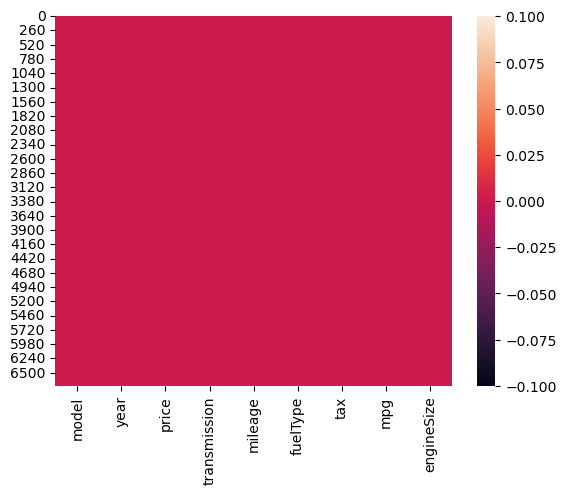

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


# VISUALILASI DATA

<Axes: >

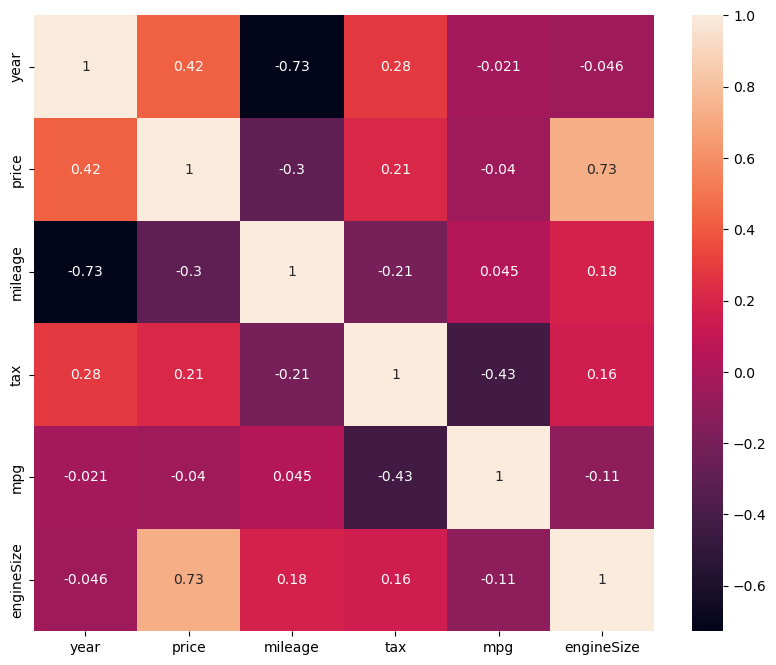

In [12]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True)

# JUMLAH MOBIL BERDASARKAN MODEL

In [13]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax': 'number_of_cars'})

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250')])

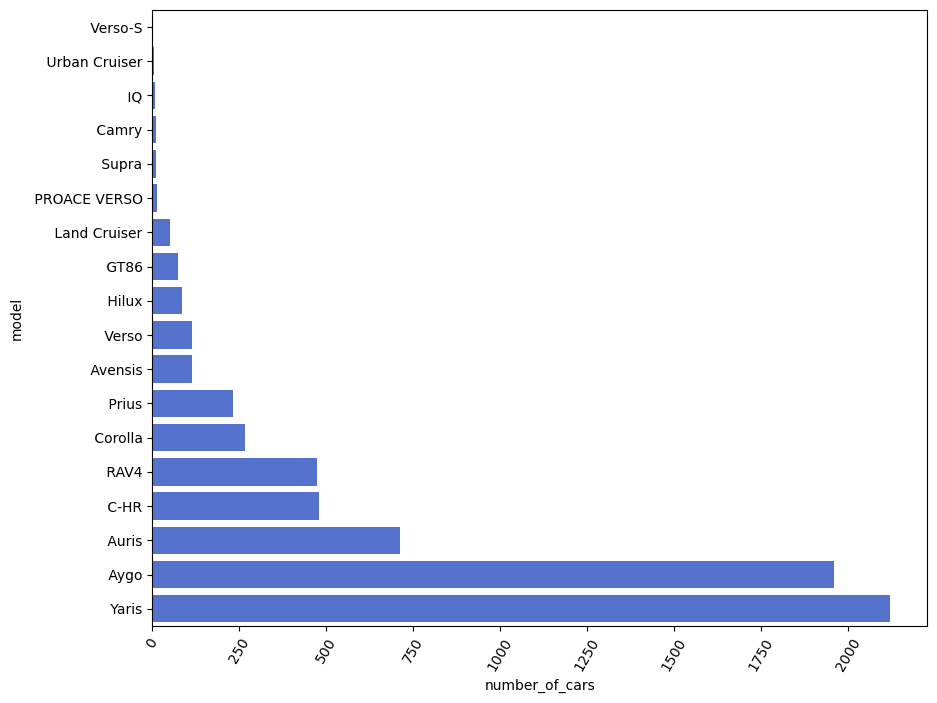

In [15]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x=models['number_of_cars'], y=models['model'], color='royalblue')
plt.xticks(rotation=60)

# UKURAN MESIN

In [18]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax': 'count'})

<Axes: xlabel='engineSize', ylabel='count'>

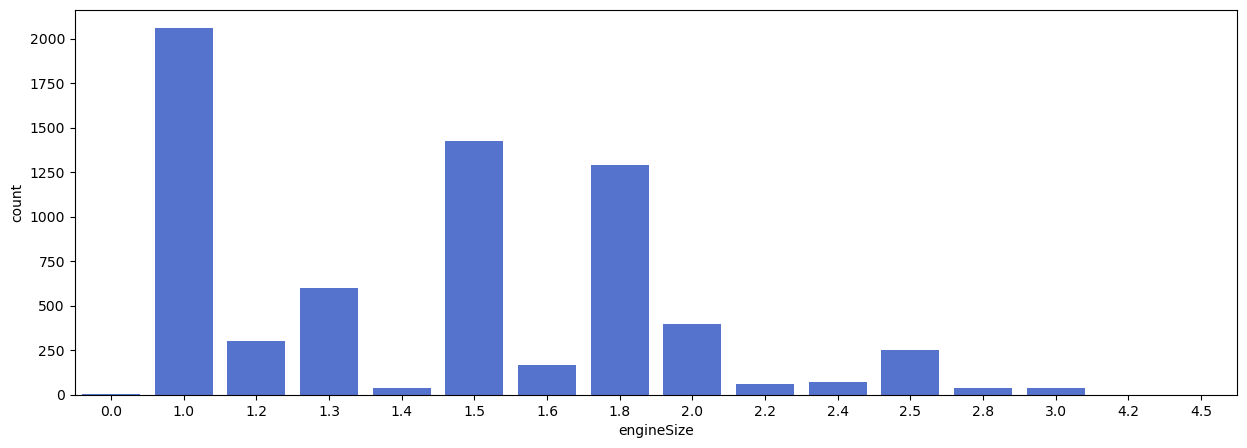

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')


# DISTRIBUSI MILEAGE (JARAK TEMPUH)

<Figure size 1500x500 with 0 Axes>

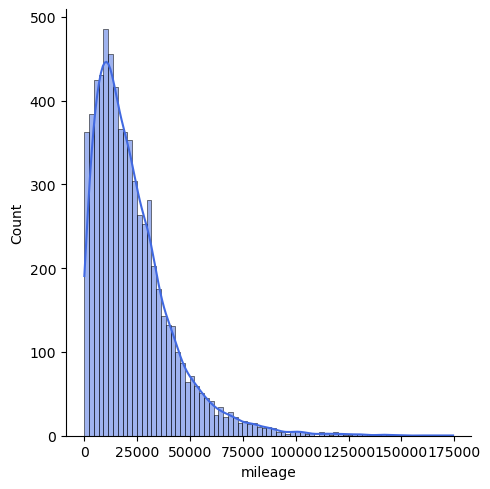

In [24]:
plt.figure(figsize=(15,5))
sns.displot(df['mileage'], kde=True, color='royalblue')

# DISTRIBUSI HARGA MOBIL

<Figure size 1500x500 with 0 Axes>

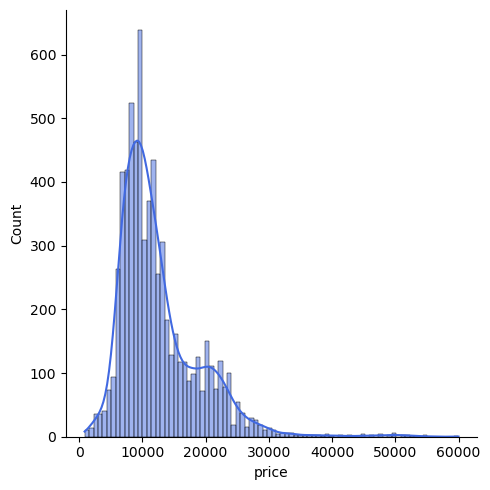

In [25]:
plt.figure(figsize=(15,5))
sns.displot(df['price'], kde=True, color='royalblue')

# SELEKSI FITUR

In [26]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6738, 5), (6738,))

# SPLIT DATA TRAINING DAN DATA TESTING

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70)
y_test.shape

(1685,)

# MEMBUAT MODEL REGRESI LINIER

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [29]:
score = lr.score(x_test, y_test)
print('Akurasi model regresi linier = ', score)

Akurasi model regresi linier =  0.7678983314475207


# MEMBUAT INPUT MODEL REGRESI

In [31]:
# year, mileage, tax, mpg, engineSize
input_data = np.array([[2019, 5000, 145, 30, 2.2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR = ', prediction)

Estimasi harga mobil dalam EUR =  [23525.89301279]


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# SAVE MODEL

In [32]:
import pickle

filename = 'estimasi_mobil_toyota.sav'
pickle.dump(lr, open(filename, 'wb'))